In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [49]:
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test.csv")
pd.set_option("display.max_columns",None)
#pd.reset_option("max_columns")
#training and testing of the data

In [50]:
dataset = pd.concat([train,test])
data = dataset.copy()

data.head(1)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31548 entries, 0 to 9464
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        31548 non-null  object 
 1   Patient Age                                       30121 non-null  float64
 2   Genes in mother's side                            31548 non-null  object 
 3   Inherited from father                             30691 non-null  object 
 4   Maternal gene                                     25015 non-null  object 
 5   Paternal gene                                     31548 non-null  object 
 6   Blood cell count (mcL)                            31548 non-null  float64
 7   Patient First Name                                31548 non-null  object 
 8   Family Name                                       12540 non-null  object 
 9   Father's name          

In [52]:
#Function to get unique values of columns
def get_unique_values(df,columns):
    for col in columns:
        print(col,":",df[col].unique())
        print()

columns = data.columns
get_unique_values(data,columns)

Patient Id : ['PID0x6418' 'PID0x25d5' 'PID0x4a82' ... 'PID0x5408' 'PID0x2017'
 'PID0x7f61']

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]

Genes in mother's side : ['Yes' 'No']

Inherited from father : ['No' 'Yes' nan]

Maternal gene : ['Yes' 'No' nan]

Paternal gene : ['No' 'Yes']

Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 4.89835233 4.80483966 5.42123643]

Patient First Name : ['Richard' 'Mike' 'Kimberly' ... 'Alejandrina' 'Karolyn' 'Jerrod']

Family Name : [nan 'Hoelscher' 'Stutzman' ... 'Rodrigue' 'Lebron' 'Dilworth']

Father's name : ['Larre' 'Brycen' 'Nashon' ... 'Shamond' 'Nasir' 'Jatorian']

Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]

Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 

In [53]:
#Replace column values that represent the same thing with a single value
data["Birth asphyxia"].replace(to_replace='No record',value=np.nan,inplace=True)
data["Birth asphyxia"].replace(to_replace='Not available',value=np.nan,inplace=True)
data["Autopsy shows birth defect (if applicable)"].replace(to_replace='None',value=np.nan,inplace=True)
data["H/O radiation exposure (x-ray)"].replace(to_replace='-',value=np.nan,inplace=True)
data["H/O substance abuse"].replace(to_replace='-',value=np.nan,inplace=True)

get_unique_values(data,columns)

Patient Id : ['PID0x6418' 'PID0x25d5' 'PID0x4a82' ... 'PID0x5408' 'PID0x2017'
 'PID0x7f61']

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]

Genes in mother's side : ['Yes' 'No']

Inherited from father : ['No' 'Yes' nan]

Maternal gene : ['Yes' 'No' nan]

Paternal gene : ['No' 'Yes']

Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 4.89835233 4.80483966 5.42123643]

Patient First Name : ['Richard' 'Mike' 'Kimberly' ... 'Alejandrina' 'Karolyn' 'Jerrod']

Family Name : [nan 'Hoelscher' 'Stutzman' ... 'Rodrigue' 'Lebron' 'Dilworth']

Father's name : ['Larre' 'Brycen' 'Nashon' ... 'Shamond' 'Nasir' 'Jatorian']

Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]

Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 

In [54]:
#Drop certain columns that are not relevant for prediction
columns_to_drop = ["Patient Id","Patient First Name","Family Name","Father's name","Mother's age", 
                   "Father's age",'Institute Name','Location of Institute','Parental consent',"Place of birth"]
data.drop(columns=columns_to_drop,axis=1,inplace=True)
data.head(3)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,High,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,High,NaN,No,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Low,NaN,NaN,Not applicable,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [55]:
#Drop rows with Null values
data.dropna(inplace=True)
data.index = [i for i in range(len(data))]

In [56]:
#Get unique values of the remaining columns
useful_columns = [col for col in data.columns if col not in columns_to_drop]
get_unique_values(data,useful_columns)

Patient Age : [11.  4. 10.  6.  5.  1.  2.  3.  7. 14.  9.  0. 13.  8. 12.]

Genes in mother's side : ['No' 'Yes']

Inherited from father : ['No' 'Yes']

Maternal gene : ['Yes' 'No']

Paternal gene : ['No' 'Yes']

Blood cell count (mcL) : [5.209058   4.75227171 4.75145212 ... 5.05644043 5.11729596 5.07755359]

Status : ['Alive' 'Deceased']

Respiratory Rate (breaths/min) : ['Tachypnea' 'Normal (30-60)']

Heart Rate (rates/min : ['Tachycardia' 'Normal']

Test 1 : [0.]

Test 2 : [0.]

Test 3 : [0.]

Test 4 : [1.]

Test 5 : [0.]

Follow-up : ['Low' 'High']

Gender : ['Male' 'Ambiguous' 'Female']

Birth asphyxia : ['Yes' 'No']

Autopsy shows birth defect (if applicable) : ['Not applicable' 'Yes' 'No']

Folic acid details (peri-conceptional) : ['Yes' 'No']

H/O serious maternal illness : ['Yes' 'No']

H/O radiation exposure (x-ray) : ['No' 'Yes' 'Not applicable']

H/O substance abuse : ['No' 'Not applicable' 'Yes']

Assisted conception IVF/ART : ['No' 'Yes']

History of anomalies in previou

In [57]:
#From the previous ouput above, Test 1-5 are not relevant for predicting so they are dropped
#data.drop(columns=["Test 1","Test 2","Test 3","Test 4","Test 5"],axis=1,inplace=True)
data.head(1)
data.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Follow-up', 'Gender',
       'Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [58]:
len(data.columns)

35

In [59]:
#joblib.dump(data.columns.tolist(), "x_columns.pkl")

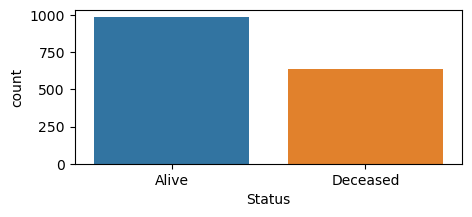

In [60]:
#Mortality
plt.figure(figsize=(5,2))
sns.countplot(x="Status",data=data)
plt.show()

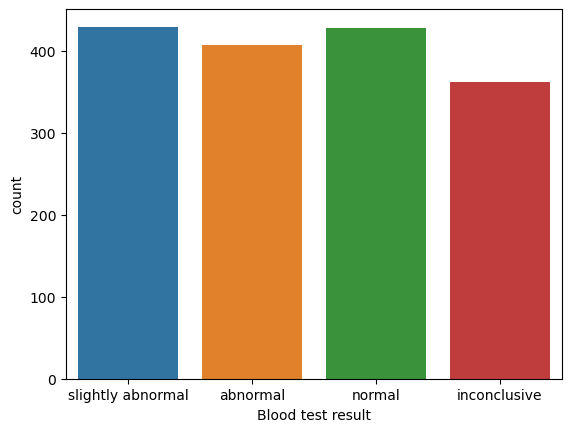

In [61]:
#Blood test result
sns.countplot(x="Blood test result",data=data)
plt.show()

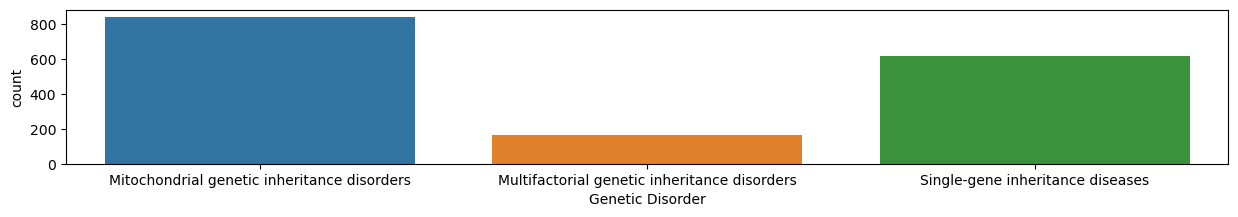

In [62]:
#Genetic Disorder count
plt.figure(figsize=(15,2))
sns.countplot(x="Genetic Disorder",data=data)
plt.show()

In [63]:
#PREDICTING GENETIC DISORDER

#Get X and Y and also convert all values to numerical values
X1 = pd.get_dummies(data.drop("Genetic Disorder",axis=1))
Y2 = data["Genetic Disorder"]

#Instantiate our models
gb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()

#Use cross validation to get the performance/accuracy of the models across different subsets
models = [gb,svc,rfc]
for model in models:
    print(model,'=',cross_val_score(model, X1, Y2, cv=6),"\n")


GaussianNB() = [1. 1. 1. 1. 1. 1.] 

SVC() = [0.99261993 0.98154982 0.98154982 0.98523985 0.98523985 0.98892989] 

RandomForestClassifier() = [0.99630996 0.99630996 1.         1.         0.99261993 1.        ] 



In [64]:
#PREDICTING DISORDER SUBCLASS

#Get X and Y and also convert all values to numerical values
X2 = pd.get_dummies(data.drop("Disorder Subclass",axis=1))
Y2 = data["Disorder Subclass"]

#Instantiate our models
gb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()

#Use cross validation to get the performance/accuracy of the models across different subsets
models = [gb,svc,rfc]
for model in models:
    print(model,'=',cross_val_score(model, X2, Y2, cv=6),"\n")


GaussianNB() = [0.60885609 0.63468635 0.60147601 0.63099631 0.62730627 0.5904059 ] 

SVC() = [0.63468635 0.63099631 0.58671587 0.60147601 0.63468635 0.65682657] 

RandomForestClassifier() = [0.65682657 0.62361624 0.64206642 0.63837638 0.65682657 0.65682657] 



In [65]:
#Further actions to increase model accuracy for "Disorder Subclass" prediction

#Increase the training dataset for the models
xtrain,xtest,ytrain,ytest = train_test_split(X2,Y2,random_state=40,train_size=.85)

#Instantiate our models
gb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()

#Gaussian Naive Bayes Classification
gb.fit(xtrain,ytrain)
gb_pred = gb.predict(xtest)
gb_score = accuracy_score(gb_pred,ytest)
print("Gaussian Naive Bayes score:",gb_score)

#Support Vector Classification
svc.fit(xtrain,ytrain)
svc_pred = svc.predict(xtest)
svc_score = accuracy_score(svc_pred,ytest)
print("Support Vector Classification score:",svc_score)

#Random Forest Classification
rfc.fit(xtrain,ytrain)
rfc_pred = rfc.predict(xtest)
rfc_score = accuracy_score(rfc_pred,ytest)
print("Random Forest Classification score:",rfc_score)



Gaussian Naive Bayes score: 0.6147540983606558
Support Vector Classification score: 0.6639344262295082
Random Forest Classification score: 0.6598360655737705


In [70]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test.csv")
data = pd.concat([train, test])

# Replace values
data["Birth asphyxia"].replace(['No record', 'Not available'], np.nan, inplace=True)
data["Autopsy shows birth defect (if applicable)"].replace("None", np.nan, inplace=True)
data["H/O radiation exposure (x-ray)"].replace("-", np.nan, inplace=True)
data["H/O substance abuse"].replace("-", np.nan, inplace=True)

# Drop columns not useful
columns_to_drop = ["Patient Id","Patient First Name","Family Name","Father's name","Mother's age", 
                   "Father's age",'Institute Name','Location of Institute','Parental consent',"Place of birth"]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Drop test columns
data.drop(columns=["Test 1","Test 2","Test 3","Test 4","Test 5"], axis=1, inplace=True)

# Prepare features and label
X = pd.get_dummies(data.drop("Disorder Subclass", axis=1))
y = data["Disorder Subclass"]

# Train model
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=0.85)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

# Save column order for encoding new inputs
#model_features = X.columns
model_features = X.columns.tolist()


# Define prediction function
def predict_disorder(
    age, genes_mother, inherited_father, maternal_gene, paternal_gene,
    blood_cell_count, status, resp_rate, heart_rate,
    follow_up, gender, birth_asphyxia, autopsy, folic_acid,
    maternal_illness, radiation_exposure, substance_abuse,
    ivf, previous_anomalies, previous_abortions, birth_defects,
    wbc_count, blood_test_result,
    symptom1, symptom2, symptom3, symptom4, symptom5
):
    input_dict = {
        "Patient Age": age,
        "Genes in mother's side": genes_mother,
        "Inherited from father": inherited_father,
        "Maternal gene": maternal_gene,
        "Paternal gene": paternal_gene,
        "Blood cell count (mcL)": blood_cell_count,
        "Status": status,
        "Respiratory Rate (breaths/min)": resp_rate,
        "Heart Rate (rates/min": heart_rate,
        "Follow-up": follow_up,
        "Gender": gender,
        "Birth asphyxia": birth_asphyxia,
        "Autopsy shows birth defect (if applicable)": autopsy,
        "Folic acid details (peri-conceptional)": folic_acid,
        "H/O serious maternal illness": maternal_illness,
        "H/O radiation exposure (x-ray)": radiation_exposure,
        "H/O substance abuse": substance_abuse,
        "Assisted conception IVF/ART": ivf,
        "History of anomalies in previous pregnancies": previous_anomalies,
        "No. of previous abortion": previous_abortions,
        "Birth defects": birth_defects,
        "White Blood cell count (thousand per microliter)": wbc_count,
        "Blood test result": blood_test_result,
        "Symptom 1": symptom1,
        "Symptom 2": symptom2,
        "Symptom 3": symptom3,
        "Symptom 4": symptom4,
        "Symptom 5": symptom5,
    }

    input_df = pd.DataFrame([input_dict])
    input_encoded = pd.get_dummies(input_df)

# Reindex to match the training columns
    input_encoded = input_encoded.reindex(columns=model_features, fill_value=0)

    #input_encoded = pd.get_dummies(input_df)
    #input_encoded = input_encoded.reindex(columns=model_features, fill_value=0)
    prediction = model.predict(input_encoded)[0]
    return prediction

# Define input components
inputs = [
    gr.Number(label="Patient Age"),
    gr.Radio(["Yes", "No"], label="Genes in mother's side"),
    gr.Radio(["Yes", "No"], label="Inherited from father"),
    gr.Radio(["Yes", "No", "Unknown"], label="Maternal gene"),
    gr.Radio(["Yes", "No", "Unknown"], label="Paternal gene"),
    gr.Number(label="Blood cell count (mcL)"),
    gr.Radio(["Alive", "Deceased"], label="Status"),
    gr.Text(label="Respiratory Rate (breaths/min)"),
    gr.Text(label="Heart Rate (rates/min)"),
    gr.Radio(["Low", "Normal", "High"], label="Follow-up"),
    gr.Radio(["Male", "Female"], label="Gender"),
    gr.Radio(["Yes", "No", "Not available"], label="Birth asphyxia"),
    gr.Text(label="Autopsy shows birth defect (if applicable)"),
    gr.Radio(["Yes", "No"], label="Folic acid details (peri-conceptional)"),
    gr.Radio(["Yes", "No"], label="H/O serious maternal illness"),
    gr.Text(label="H/O radiation exposure (x-ray)"),
    gr.Text(label="H/O substance abuse"),
    gr.Radio(["Yes", "No"], label="Assisted conception IVF/ART"),
    gr.Radio(["Yes", "No"], label="History of anomalies in previous pregnancies"),
    gr.Number(label="No. of previous abortion"),
    gr.Text(label="Birth defects"),
    gr.Number(label="White Blood cell count (thousand per microliter)"),
    gr.Text(label="Blood test result"),
    gr.Text(label="Symptom 1"),
    gr.Text(label="Symptom 2"),
    gr.Text(label="Symptom 3"),
    gr.Text(label="Symptom 4"),
    gr.Text(label="Symptom 5"),
]

# Launch Gradio app
gr.Interface(
    fn=predict_disorder,
    inputs=inputs,
    outputs=gr.Label(label="Predicted Disorder Subclass"),
    title="Genetic Disorder Subclass Predictor",
    description="Enter patient data to predict genetic disorder "
).launch()

def predict_disorder(*args):
    possible_disorders = [
        "Cystic fibrosis", "Diabetes", "Leigh syndrome", "Cancer", 
        "Tay-Sachs", "Hemochromatosis", "Mitochondrial myopathy"
    ]
    return random.choice(possible_disorders)


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


In [68]:
import pandas as pd

# Raw input values (from your earlier example)
raw_values = ["PID0x25d5",5.0,"Yes","Yes","No","No",5.910669059571037,"Mike",None,"Brycen",None,23.0,
              "St. Margaret's Hospital For Women","1515 COMMONWEALTH AV ALLSTON/BRIGHTON, MA 02135 (42.34665771451756, -71.14136122385321)",
              "Deceased","Tachypnea","Normal",None,1.0,0.0,1.0,0.0,"Yes","High",None,"No","None",None,
              "Yes","Yes","Not applicable","Not applicable","No","Yes",None,"Multiple",5.522559926086473,"normal",
              1.0,None,0.0,0.0,0.0,None,"abc fibrosis"]

# Column names
columns = ["Patient Id","Patient Age","Genes in mother's side","Inherited from father","Maternal gene",
           "Paternal gene","Blood cell count (mcL)","Patient First Name","Family Name","Father's name",
           "Mother's age","Father's age","Institute Name","Location of Institute","Status",
           "Respiratory Rate (breaths/min)","Heart Rate (rates/min","Test 1","Test 2","Test 3",
           "Test 4","Test 5","Parental consent","Follow-up","Gender","Birth asphyxia",
           "Autopsy shows birth defect (if applicable)","Place of birth","Folic acid details (peri-conceptional)",
           "H/O serious maternal illness","H/O radiation exposure (x-ray)","H/O substance abuse",
           "Assisted conception IVF/ART","History of anomalies in previous pregnancies",
           "No. of previous abortion","Birth defects","White Blood cell count (thousand per microliter)",
           "Blood test result","Symptom 1","Symptom 2","Symptom 3","Symptom 4","Symptom 5",
           "Genetic Disorder","Disorder Subclass"]

# Create DataFrame
custom_df = pd.DataFrame([raw_values], columns=columns)

# Drop target columns if present
custom_df = custom_df.drop(columns=["Genetic Disorder", "Disorder Subclass"])

# Apply same one-hot encoding as training data
custom_df_encoded = pd.get_dummies(custom_df)

# Align with training feature set
custom_df_encoded = custom_df_encoded.reindex(columns=X2.columns, fill_value=0)

# Make prediction
prediction = rfc.predict(custom_df_encoded)

# If LabelEncoder was used:
# prediction = label_encoder.inverse_transform(prediction)

print("Predicted Disorder Subclass:", prediction[0])


Predicted Disorder Subclass: Tay-Sachs
